In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import matplotlib as mpl
    
import sys  
sys.path.insert(0, '../src/')

from astropy.table import Table

from jsm_routines import SHMF, CSMF
import os

>>> Normalizing primordial power spectrum P(k)=(k/k_0)^n_s ...
    such that sigma(R=8Mpc/h) =   0.8000.
>>> Tabulating sigma(M,z=0) ...
    From now on, sigma(M,z) is computed by interpolation.
>>> Tabulating z(W) and z(t_lkbk)...
>>> Preparing output redshifts for merger trees ...
    Number of output redshifts =  354, up to z = 20.06
>>> Tabulating Parkinson+08 J(u_res) ...
>>> Building interpolation grid for Green+19 M(<r|f_b,c)...
>>> Building interpolation grid for Green+19 sigma(r|f_b,c)...
>>> Building interpolation grid for Green+19 d2Phidr2(r|f_b,c)...
>>> Building interpolator for Jiang+15 orbit sampler...


In [7]:
as_data = np.load("../../data/12_4_0/numpy/acc_surv_mass.npy")
as_red = np.load("../../data/12_4_0/numpy/acc_surv_redshift.npy")

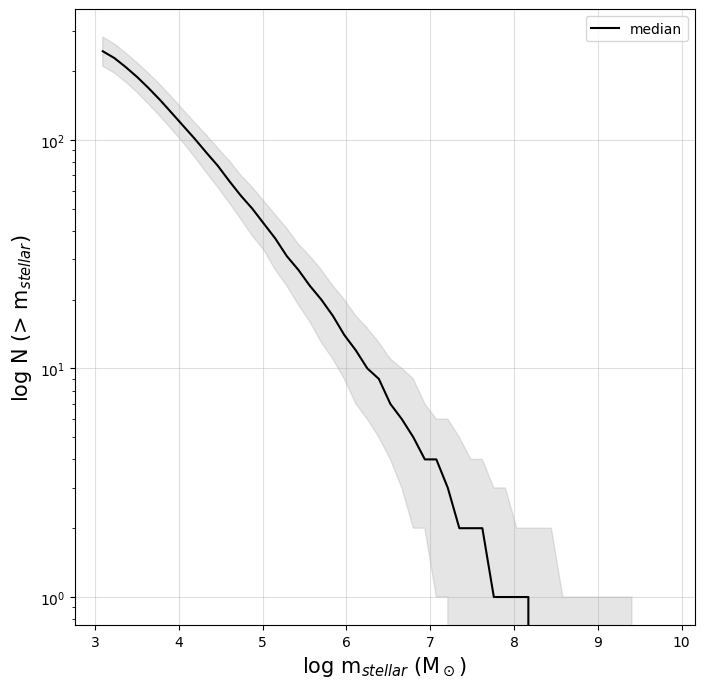

In [3]:
surv_massr, surv_CSMF = CSMF(as_data, shmr=1) # determinisitic

### now sampling 100 values of scatter

In [4]:
scatter_range = np.linspace(0,.3,100)

In [5]:
mat = np.zeros(shape=(100, 3, 50))

for i,val in enumerate(scatter_range):
    
    surv_massr_i, surv_CSMF_i = CSMF(as_data, shmr=2, scatter=val, plot=False) 

    mat[i] = surv_CSMF_i

In [8]:
norm = mpl.colors.Normalize(vmin=scatter_range.min(), vmax=scatter_range.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.viridis_r)

colors = mpl.cm.viridis_r(np.linspace(0, 1, 100))


/var/folders/91/ygwd64w5659_623tzhx80kbc0000gn/T/ipykernel_11704/3242984175.py:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cmap, label="SHMR scatter (dex)")


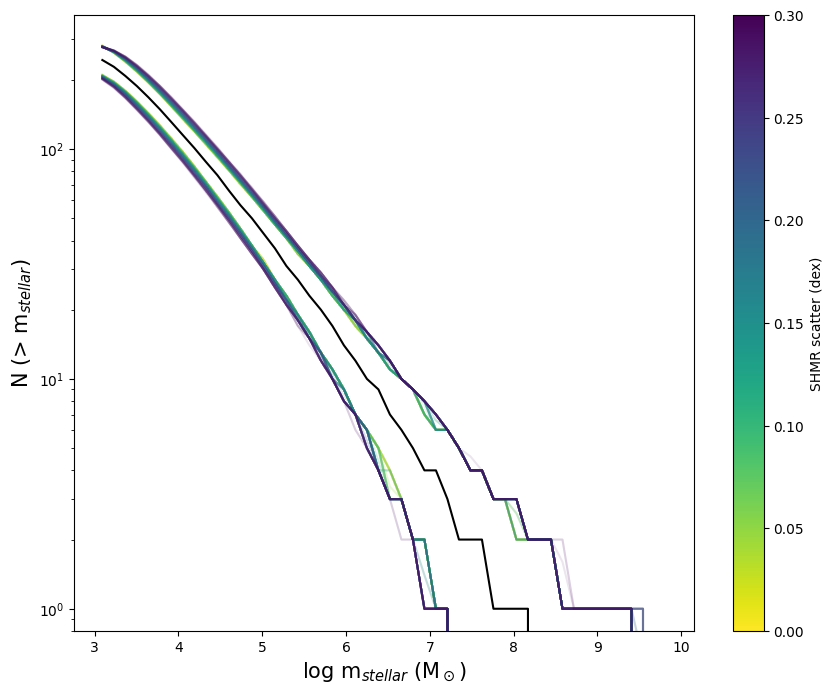

In [9]:
plt.figure(figsize=(10,8))

for i,val in enumerate(mat):
    
    plt.plot(surv_massr, val[0,:], alpha=0.1, color=colors[i])
    plt.plot(surv_massr, val[2,:], alpha=0.1, color=colors[i])

plt.plot(surv_massr, surv_CSMF[1,:], color="black")

plt.yscale("log")
plt.colorbar(cmap, label="SHMR scatter (dex)")
plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("N (> m$_{stellar}$)", fontsize=15)
plt.ylim(0.8)
plt.show()

/var/folders/91/ygwd64w5659_623tzhx80kbc0000gn/T/ipykernel_11704/4245629291.py:14: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cmap, label="SHMR scatter (dex)")


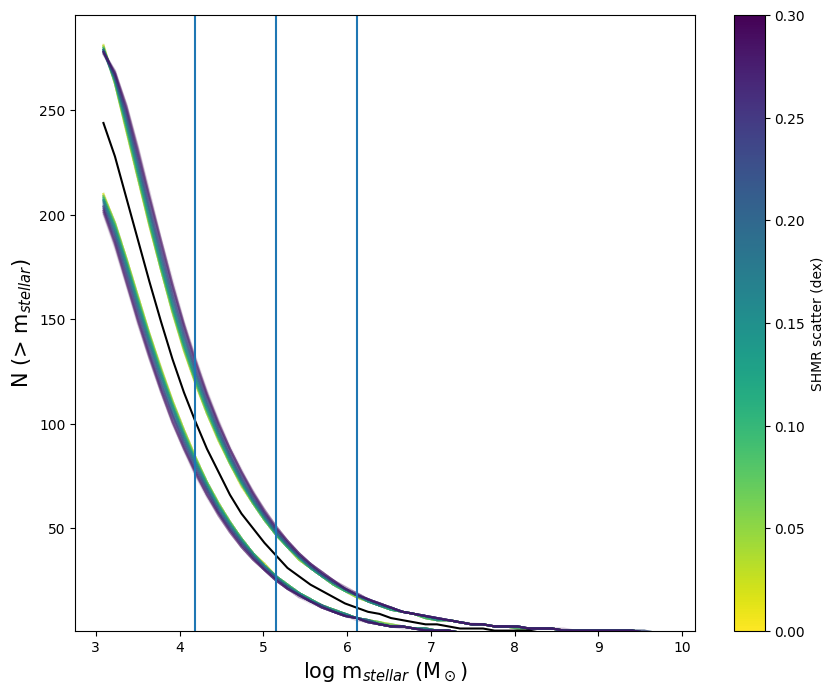

In [17]:
plt.figure(figsize=(10,8))

for i,val in enumerate(mat):
    
    plt.plot(surv_massr, val[0,:], alpha=0.1, color=colors[i])
    plt.plot(surv_massr, val[2,:], alpha=0.1, color=colors[i])

plt.plot(surv_massr, surv_CSMF[1,:], color="black")
plt.axvline(4.19)
plt.axvline(5.15)
plt.axvline(6.11)


plt.colorbar(cmap, label="SHMR scatter (dex)")
plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("N (> m$_{stellar}$)", fontsize=15)
plt.ylim(0.8)
plt.show()

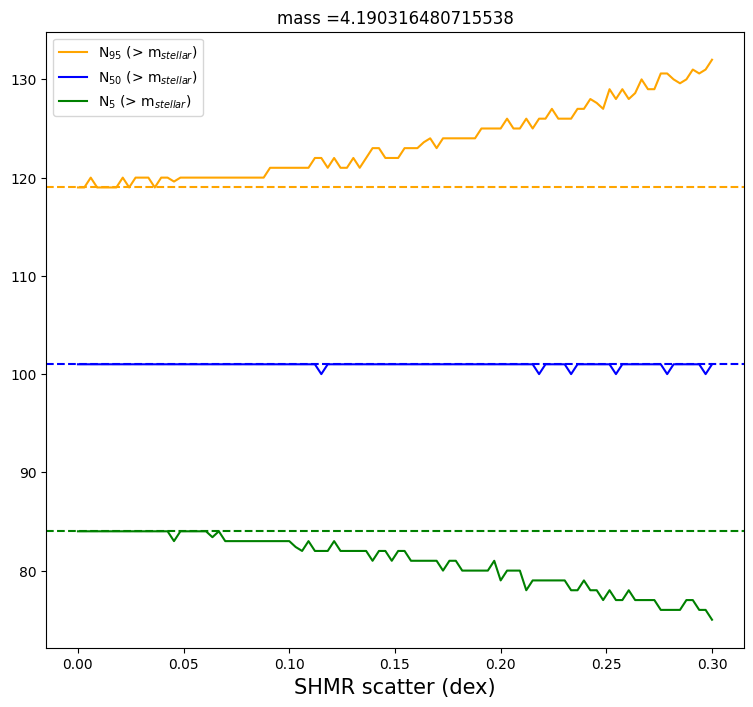

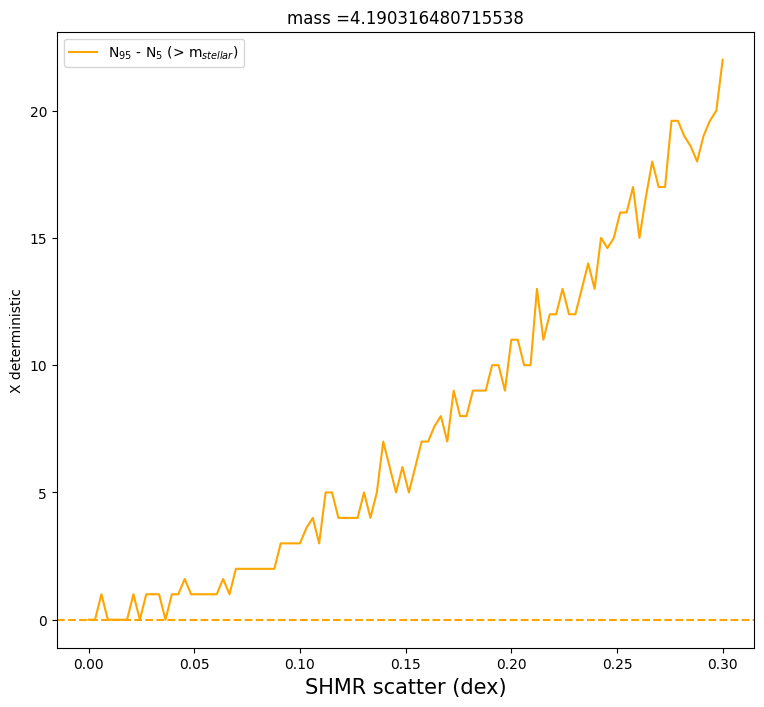

In [18]:
i = 8

plt.figure(figsize=(9,8))
plt.title("mass ="+str(surv_massr[i]))
plt.plot(scatter_range, mat[:,2,i], label="$\mathrm{N}_{95}$ (> m$_{stellar}$)", color="orange")
plt.plot(scatter_range, mat[:,1,i], label="$\mathrm{N}_{50}$ (> m$_{stellar}$)", color="blue")
plt.plot(scatter_range, mat[:,0,i], label="$\mathrm{N}_{5}$ (> m$_{stellar}$)", color="green")
plt.axhline(surv_CSMF[2, i], color="orange", ls="--")
plt.axhline(surv_CSMF[1, i], color="blue", ls="--")
plt.axhline(surv_CSMF[0, i], color="green", ls="--")
plt.xlabel("SHMR scatter (dex)", fontsize=15)
plt.legend()
plt.show()

val = surv_CSMF[2, i] - surv_CSMF[0, i]

plt.figure(figsize=(9,8))
plt.title("mass ="+str(surv_massr[i]))
plt.plot(scatter_range, (mat[:,2,i] - mat[:,0,i])-val, label="$\mathrm{N}_{95}$ - $\mathrm{N}_{5}$ (> m$_{stellar}$)", color="orange")
plt.axhline(0, color="orange", ls="--")
plt.xlabel("SHMR scatter (dex)", fontsize=15)
plt.ylabel("X deterministic")
plt.legend()
plt.show()

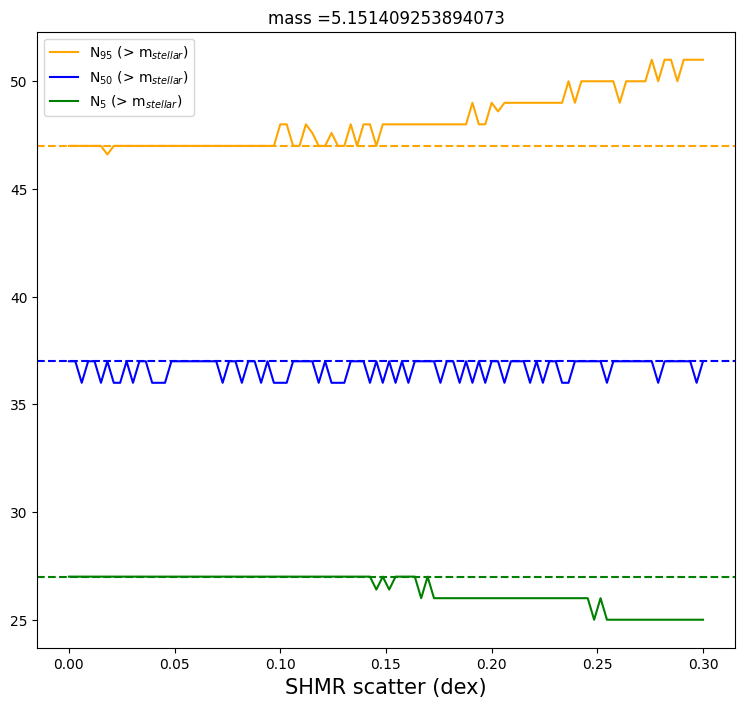

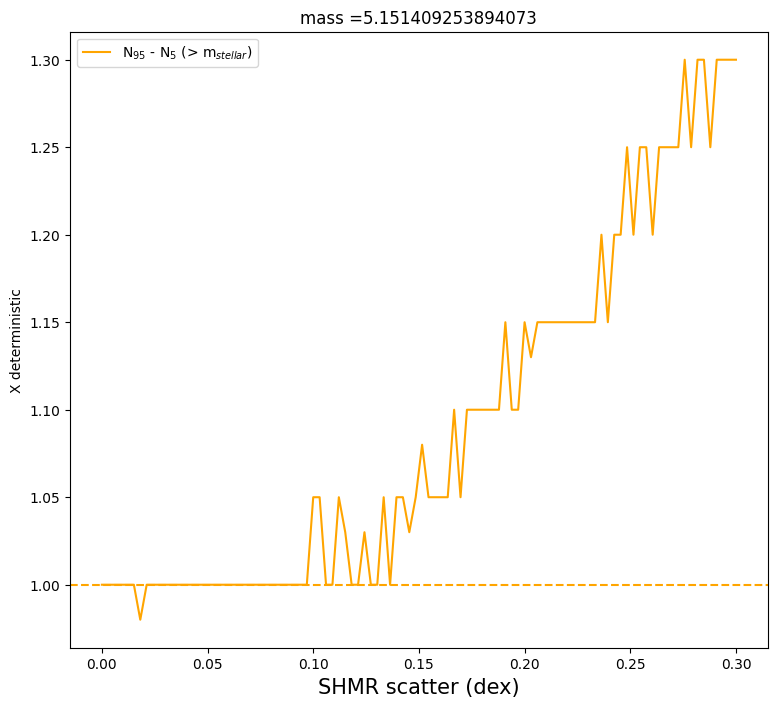

In [12]:
i = 15

plt.figure(figsize=(9,8))
plt.title("mass ="+str(surv_massr[i]))
plt.plot(scatter_range, mat[:,2,i], label="$\mathrm{N}_{95}$ (> m$_{stellar}$)", color="orange")
plt.plot(scatter_range, mat[:,1,i], label="$\mathrm{N}_{50}$ (> m$_{stellar}$)", color="blue")
plt.plot(scatter_range, mat[:,0,i], label="$\mathrm{N}_{5}$ (> m$_{stellar}$)", color="green")
plt.axhline(surv_CSMF[2, i], color="orange", ls="--")
plt.axhline(surv_CSMF[1, i], color="blue", ls="--")
plt.axhline(surv_CSMF[0, i], color="green", ls="--")
plt.xlabel("SHMR scatter (dex)", fontsize=15)
plt.legend()
plt.show()

val = surv_CSMF[2, i] - surv_CSMF[0, i]

plt.figure(figsize=(9,8))
plt.title("mass ="+str(surv_massr[i]))
plt.plot(scatter_range, (mat[:,2,i] - mat[:,0,i])/val, label="$\mathrm{N}_{95}$ - $\mathrm{N}_{5}$ (> m$_{stellar}$)", color="orange")
plt.axhline(1, color="orange", ls="--")
plt.xlabel("SHMR scatter (dex)", fontsize=15)
plt.ylabel("X deterministic")
plt.legend()
plt.show()

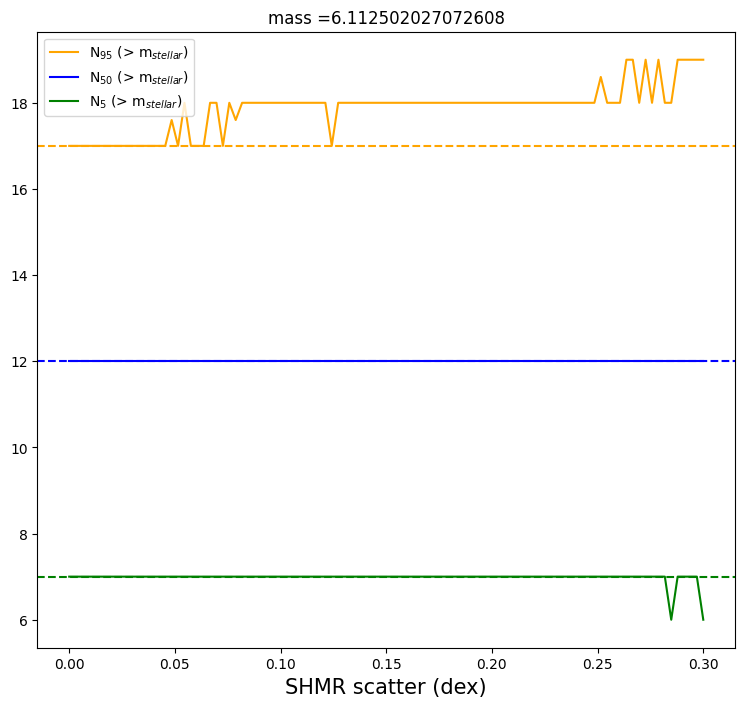

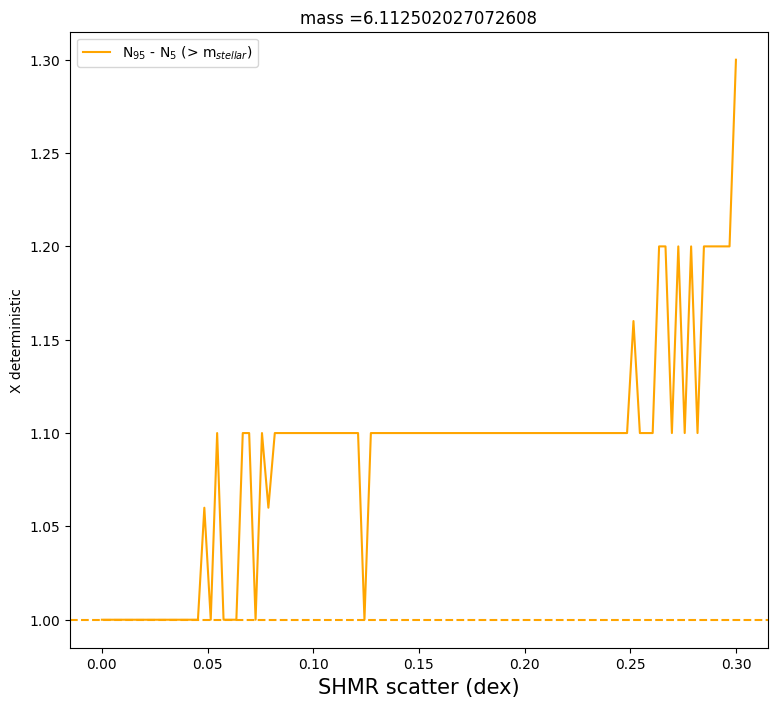

In [16]:
i = 22

plt.figure(figsize=(9,8))
plt.title("mass ="+str(surv_massr[i]))
plt.plot(scatter_range, mat[:,2,i], label="$\mathrm{N}_{95}$ (> m$_{stellar}$)", color="orange")
plt.plot(scatter_range, mat[:,1,i], label="$\mathrm{N}_{50}$ (> m$_{stellar}$)", color="blue")
plt.plot(scatter_range, mat[:,0,i], label="$\mathrm{N}_{5}$ (> m$_{stellar}$)", color="green")
plt.axhline(surv_CSMF[2, i], color="orange", ls="--")
plt.axhline(surv_CSMF[1, i], color="blue", ls="--")
plt.axhline(surv_CSMF[0, i], color="green", ls="--")
plt.xlabel("SHMR scatter (dex)", fontsize=15)
plt.legend()
plt.show()

val = surv_CSMF[2, i] - surv_CSMF[0, i]

plt.figure(figsize=(9,8))
plt.title("mass ="+str(surv_massr[i]))
plt.plot(scatter_range, (mat[:,2,i] - mat[:,0,i])/val, label="$\mathrm{N}_{95}$ - $\mathrm{N}_{5}$ (> m$_{stellar}$)", color="orange")
plt.axhline(1, color="orange", ls="--")
plt.xlabel("SHMR scatter (dex)", fontsize=15)
plt.ylabel("X deterministic")
plt.legend()
plt.show()